# Kmeans Algorithm Using Intel® Extension for Scikit-learn*

![Assets/kmeans.png](Assets/kmeans.png)

<a id='Back-to-Sections'></a>
# Sections
- _Discussion:_ [Kmeans Algorithm](#Kmeans-Algorithm)
- _Code:_ [Implementation of Kmeans targeting CPU using Intel Extension for Scikit-learn for Kmeans interactive](#Implementation-of-Kmeans-in-Batch-mode)
- _Code:_ [Implementation of Kmeans targeting **Distributed CPU** using Intel Extension for Scikit-learn for Kmeans](#Implementation-of-Kmeans-using-Distributed-Processing)
- _Code:_ [Implementation of Kmeans targeting **GPU** using Intel Extension for Scikit-learn for Kmeans](#Implementation-of-Kmeans-targeting-GPU)

You will review, modify and execute code for unsupervised clustering of data using Intel Extension for Scikit-learn for Kmeans and DBSCAN on a single CPU, single Gpu, and distributed across multiple CPU



## Learning Objectives

* Describe the value of Intel® Extension for Scikit-learn methodology in extending scikit-learn optimzation capabilites
* Name key imports and function calls to use Intel Extension for Scikit-learn to target Kmeans for use on CPU, GPU and distributed CPU environments
* Apply a single Daal4py function to enable Kmeans targeting CPU and GPU using SYCL context
* Build a Sklearn implementation of Kmeans targeting CPU and GPU using Intel optimized Sklearn Extensions for Kmeans


## Library Dependencies:
 - **pip install pickle**
 - also requires these libraries if they are not already installed: **matplotlib, numpy, pandas**

# Intel Extension for Scikit-learn

Intel® Extension for Scikit-learn contains drop-in replacement patching functionality for the Scikit-learn machine learning library for Python. The patches were originally available in the daal4py package. All future updates for the patching will be available only in Intel Extension for Scikit-learn. All performance claims obtained using daal4py are applicable for Intel Extension for Scikit-learn.

The value of the patch is providing optimized versions of common Scikit-learn machine learning algorithms used for data science. An added value is the ability to invoke these functions on either CPU or GPU.

Applying Intel(R) Extension for Scikit-learn will impact the following existing [scikit-learn algorithms:](https://intel.github.io/scikit-learn-intelex/algorithms.html)

You can take advantage of the optimizations of Intel Extension for Scikit-learn by adding just two lines of code before the usual Scikit-learn imports:

 - from sklearnex import patch_sklearn
 - patch_sklearn()

 - from sklearn.cluster import KMeans
 - ... import other sklearn algoritms as needed ...

Intel Extension for Scikit-learn uses Intel® oneAPI Data Analytics Library (oneDAL) to achieve its acceleration. The optimizations aim for the efficient use of CPU resources. The library enables all the latest vector instructions, such as Intel® Advanced Vector Extensions (Intel AVX-512). It also uses cache-friendly data blocking, fast Basic Linear Algebra Subprograms (BLAS) operations with Intel OneAPI Math Kernel Library (oneMKL), scalable multi-threading with Intel oneAPI Thread Building Blocks (oneTBB) library, and more.

## Intel® oneAPI Data Analytics Library (oneDAL) aka daal4py
As mentioned, Intel Extension for Scikit-learn uses Intel® oneAPI Data Analytics Library (oneDAL) under the hood to achieve its acceleration, and our general recommendation is to use Intel Extension for Scikit-learn whenever possible.  Most functionality found in Intel® oneAPI Data Analytics Library (oneDAL)  is exposed through the higher level interface, Intel Extension for Scikit-learn, and this is the preferred interface. However, there are a few funcctions found in Intel® oneAPI Data Analytics Library (oneDAL) not yet ported to Intel Extension for Scikit-learn so it is good to know how to leverage the functionality in either interface for now. For example, in the code below, we use daal4py to invoke the distributed compute mode for Kmeans.

oneDAL has a Python API that is provided as a standalone Python library called daal4py.

Daal4py, included in Intel® Distribution for Python* as part of the Intel® AI Analytics Toolkit, is an easy-to-use Python* API  that provides superior performance for your machine learning algorithms and frameworks. Designed for data scientists, it provides a simple way to utilize powerful Intel® DAAL machine learning algorithms in a flexible and customizable manner. For scaling capabilities, daal4py also provides you the option to process and analyze data via batch, streaming, or distributed processing modes, allowing you to choose the option to best fit your system's needs. 

The example below shows how daal4py can be used to calculate K-Means clusters:

# Kmeans Algorithm
Kmeans is a clustering algorithm that partitions observations from a dataset into a requested number of geometric clusters of points closest to the cluster’s own center of mass. Using an initial estimate of the centroids, the algorithm iteratively updates the positions of the centroids until a fixed point.


Kmeans is a simple and powerful ML algorithm to cluster data into similar groups. Its objective is to split a set of N observations into K clusters. This is achieved by minimizing inertia (i.e., the sum of squared Euclidian distances from observations to the cluster centers, or centroids). The algorithm is iterative, with two steps in each iteration:
* For each observation, compute the distance from it to each centroid, and then reassign each observation to the cluster with the nearest centroid.
* For each cluster, compute the centroid as the mean of observations assigned to this cluster.

Repeat these steps until the number of iterations exceeds a predefined maximum or the algorithm converges (i.e., the difference between two consecutive inertias is less than a predefined threshold).
Different methods are used to get initial centroids for the first iteration. The algorithm can select random observations as initial centroids or use more complex methods such as kmeans

- [Back to Sections](#Back-to-Sections)

### About the data
The data included in these exercises was built seperately using the **sklearn.datasets make_blobs** function which synthesizes data for analysis by specifying: 
 - The number of samples in the dataset called n_samples, for example n_sample = 200000
 - The number of columns in the dataset called n_features, for exmaple n_features = 50,
 - The number of cluster centers called centers, for example centers = 10, 
 - The standard deviation for each cluster called cluster_std, for example cluster_std = 0.2,
 - The spatial range over which the clusters range, called center_box for example center_box = (-10.0, 10.0), 
 - A seed called random_state, for example random_state = 777

# Plot kmeans results as computed on GPU

In [1]:
import pickle
def read_results():
    f = open('resultsDict.pkl', 'rb')   # 'rb' for reading binary file
    resultsDict = pickle.load(f)     
    f.close()  
    return(resultsDict)

resultsDict = read_results()
resultsDict

{'y_km': KMeans(init='random', max_iter=5, n_clusters=20, random_state=0),
 'pred_y': array([ 9, 13, 11, ..., 10,  5, 19], dtype=int32),
 'kmeans.labels_': array([ 9, 13, 11, ..., 10,  5, 19], dtype=int32),
 'kmeans.cluster_centers_': array([[ -17.750511  ,  -69.30062   ,  -37.097565  ,  -88.96761   ,
          -80.66969   ,  -77.764206  ,    0.11633636,   58.215664  ,
           10.4865465 ,   12.4954815 ,  -34.732445  ,   59.75621   ,
           23.947205  ,   82.74827   ,  -44.53064   ,   61.583588  ,
          -76.27908   ,  -53.863396  ,  -79.03343   ,   81.378654  ],
        [ -63.518585  ,  -33.37247   ,   35.277004  ,   50.593636  ,
          -59.25563   ,  -84.84836   ,  -36.419666  ,   50.813614  ,
           22.489367  ,   74.70982   ,  -51.130062  ,  -12.329252  ,
          -33.965942  ,  -97.86062   ,  -91.98184   ,   11.340166  ,
           55.93818   ,  -83.022415  ,  -47.015156  ,   16.84881   ],
        [  41.014454  ,    4.045502  ,   93.25139   ,   75.13196   ,
     

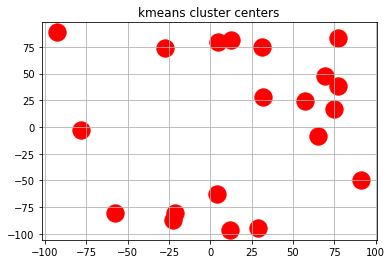

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

infile = os.path.join('data', 'batch', 'kmeans_dense.csv')
# Load the data
df = pd.read_csv(infile,  delimiter=',', usecols = range(20) , header=None, dtype=np.float32)
X = df.to_numpy()

pred_y = resultsDict['pred_y']
cluster_centers_ =  resultsDict['kmeans.cluster_centers_']
labels_ = resultsDict['kmeans.labels_']
c1 = 9
c2 = 19
plt.title('kmeans cluster centers')
plt.scatter(cluster_centers_[:, c1], cluster_centers_[:, c2], s=300, c='red')
plt.grid()
plt.show()

## Summary
In this module you will have learned the following:
* Able to Describe Daal4py and Intel Extension for Scikit-learn methodology in extending scikit-learn optimzation capabilites
* Able to Name key imports and function calls to use Intel Extension for Scikit-learn to target Kmeans for use on CPU, GPU and distributed CPU environments
* Able to Apply a single Daal4py function to enable Kmeans targeting CPU and GPU using SYCL context
* Able to Build a Sklearn implementation of Kmeans targeting CPU and GPU using Intel optimized Sklearn Extensions for Kmeans

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.

In [3]:
import pandas as pd
df = pd.read_csv('data/batch/kmeans_dense.csv')
